# A Paired T-test on Housing Unit Totals in the United States

I will be making a paired t-test on housing unit totals in the United States. I will be testing to see if the housing unit prices actually changed from 2020 to 2023.

Dataset: https://www.census.gov/data/tables/time-series/demo/popest/2020s-total-housing-units.html

In [69]:
# Importing the basic packages
import pandas as pd
import numpy as np
import math

### Data Cleaning/Preparing

In [70]:
# Importing the dataset
df = pd.read_excel('CO-EST2023-HU.xlsx')

df.head()

,Geographic Area,Estimate,2020,2021,2022,2023
0,United States,140498736.0,140808401.0,142163952.0,143789637.0,145344636.0
1,".Autauga County, Alabama",24351.0,24415.0,24765.0,25110.0,25318.0
2,".Baldwin County, Alabama",124148.0,124915.0,128477.0,132248.0,135669.0
3,".Barbour County, Alabama",11618.0,11626.0,11675.0,11755.0,11816.0
4,".Bibb County, Alabama",9004.0,9016.0,9077.0,9155.0,9208.0


In [71]:
# Removing the '.' at the beginning of each geographic area
df['Geographic Area'] = df['Geographic Area'].str.replace('.','')

In [72]:
df.head()

,Geographic Area,Estimate,2020,2021,2022,2023
0,United States,140498736.0,140808401.0,142163952.0,143789637.0,145344636.0
1,"Autauga County, Alabama",24351.0,24415.0,24765.0,25110.0,25318.0
2,"Baldwin County, Alabama",124148.0,124915.0,128477.0,132248.0,135669.0
3,"Barbour County, Alabama",11618.0,11626.0,11675.0,11755.0,11816.0
4,"Bibb County, Alabama",9004.0,9016.0,9077.0,9155.0,9208.0


In [73]:
df.describe()

,Estimate,2020,2021,2022,2023
count,3.145000e+03,3.145000e+03,3.145000e+03,3.145000e+03,3.145000e+03
mean,8.934737e+04,8.954429e+04,9.040633e+04,9.144015e+04,9.242902e+04
std,2.507977e+06,2.513506e+06,2.537699e+06,2.566712e+06,2.594468e+06
min,3.400000e+01,3.400000e+01,3.400000e+01,3.500000e+01,3.500000e+01
25%,5.202000e+03,5.216000e+03,5.231000e+03,5.269000e+03,5.296000e+03
50%,1.229500e+04,1.230900e+04,1.237300e+04,1.246000e+04,1.252000e+04
75%,3.154600e+04,3.156300e+04,3.173200e+04,3.207400e+04,3.236200e+04
max,1.404987e+08,1.408084e+08,1.421640e+08,1.437896e+08,1.453446e+08


In [74]:
df.columns

Index(['Geographic Area', 'Estimate', 2020, 2021, 2022, 2023], dtype='object')

In [75]:
df.dtypes

Geographic Area     object
Estimate           float64
2020               float64
2021               float64
2022               float64
2023               float64
dtype: object

In [76]:
# Checking if there is any null values
df.isnull().sum()

Geographic Area    0
Estimate           6
2020               6
2021               6
2022               6
2023               6
dtype: int64

I saw that there were null values so I did a quick scroll on the dataset on Excel and saw that there was some information at the end of the spreadsheet which explains the null values.

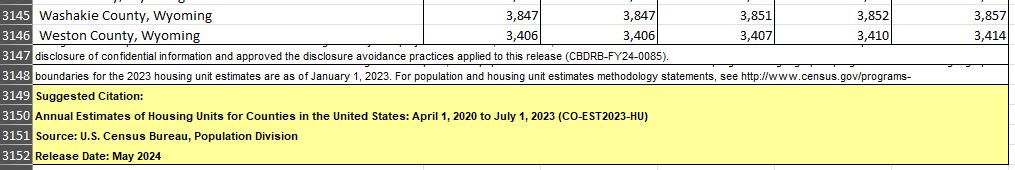

In [77]:
# These rows don't include geographic area and prices so I will remove these rows
df.tail()

,Geographic Area,Estimate,2020,2021,2022,2023
3146,Note: The estimates are based on the 2020 Cens...,NaN,NaN,NaN,NaN,NaN
3147,Suggested Citation:,NaN,NaN,NaN,NaN,NaN
3148,Annual Estimates of Housing Units for Counties...,NaN,NaN,NaN,NaN,NaN
3149,"Source: US Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN
3150,Release Date: May 2024,NaN,NaN,NaN,NaN,NaN


In [78]:
# Dropping the null values
df.dropna(inplace = True)

In [79]:
# Checking the number of null values again
df.isnull().sum()

Geographic Area    0
Estimate           0
2020               0
2021               0
2022               0
2023               0
dtype: int64

In [80]:
# Creating two dataframes of the before (2020) and after (2023)
before = df[2020]
after = df[2023]

### Start Testing

$H_{0}$: 2020 = 2023
 
$H_{1}$: 2020 $\not=$ 2023

Confidence level: 95%

With a confidence level of 95%, the p-value needs to be lower than 0.05 for use to reject the null hypothesis

In [81]:
import scipy.stats as stats

In [82]:
# Paired T-test
stats.ttest_rel(a = before,
                b = after)

TtestResult(statistic=-1.9965405980330828, pvalue=0.045961194983942695, df=3144)

The t-statistic of -2 means that that this value lies to the left side of the mean.

A p-value of 0.046 means that there is a 4.6% chance that the before and after observations are the same. This means that there is a 95.4% chance that the paired observations is significantly different.

We can reject the null hypothesis at a confidence level at 95%.